In [ ]:
import qiskit

In [6]:
from qiskit import IBMQ
IBMQ.save_account('9f8857f4b76aff1cf0d0a8f4476724e9218e4e2580c36e1997673d44aa8c14f2c0f458fe85cb1ebdcf47351ba88af4c4b0539d7db9d6d005c29153c3031c351a')

configrc.store_credentials:WARNING:2022-03-22 16:59:50,602: Credentials already present. Set overwrite=True to overwrite.


In [7]:
provider = IBMQ.load_account()
provider

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [54]:
from qiskit import Aer, QuantumCircuit, execute
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister



In [55]:
qc_output = QuantumCircuit(8)


In [80]:

# Create a Quantum Circuit acting
# on the q register
circuit = QuantumCircuit(2, 2)

# Add a H gate on qubit 0
circuit.h(0)

# Add a CX (CNOT) gate on control
# qubit 0 and target qubit 1
circuit.cx(0, 1)

# Map the quantum measurement to the
# classical bits
circuit.measure([0,1], [0,1])

# circuit.measure_all()
# Use Aer's qasm_simulator
simulator = Aer.get_backend('qasm_simulator')

# Execute the circuit on the qasm
# simulator
job = execute(circuit, simulator, shots=1000)

# Grab results from the job
result = job.result()

# Return counts
counts = result.get_counts(circuit)
print("\nTotal count for 00 and 11 are:",counts)

# Draw the circuit
circuit.draw()



Total count for 00 and 11 are: {'00': 514, '11': 486}


┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

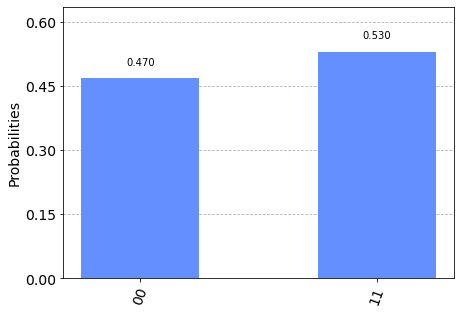

In [81]:
sim = Aer.get_backend('aer_simulator') 
result = sim.run(circuit).result()
counts = result.get_counts()
plot_histogram(counts)